<a href="https://colab.research.google.com/github/Youcheng9/Diabetes_classifier01/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
!cp "/content/drive/My Drive/diabetes_binary_health_indicators_BRFSS2015.csv" /content/

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# plt.style.use('default')

df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [27]:
#Run this when you manually import dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Unbalanced Data

In [28]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 24206


In [29]:
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")
df

Number of duplicate rows after dropping: 0


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [30]:
df[['GenHlth', 'HighBP', 'HighChol', 'BMI', 'Age', 'DiffWalk', 'HeartDiseaseorAttack', 'PhysHlth']].describe()

,GenHlth,HighBP,HighChol,BMI,Age,DiffWalk,HeartDiseaseorAttack,PhysHlth
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,2.601820,0.454343,0.441640,28.687507,8.085068,0.185751,0.103336,4.681219
std,1.064962,0.497912,0.496584,6.789204,3.094451,0.388906,0.304398,9.050877
min,1.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,24.000000,6.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,27.000000,8.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,32.000000,10.000000,0.000000,0.000000,4.000000
max,5.000000,1.000000,1.000000,98.000000,13.000000,1.000000,1.000000,30.000000


In [31]:
df.dtypes

,0
Diabetes_binary,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64


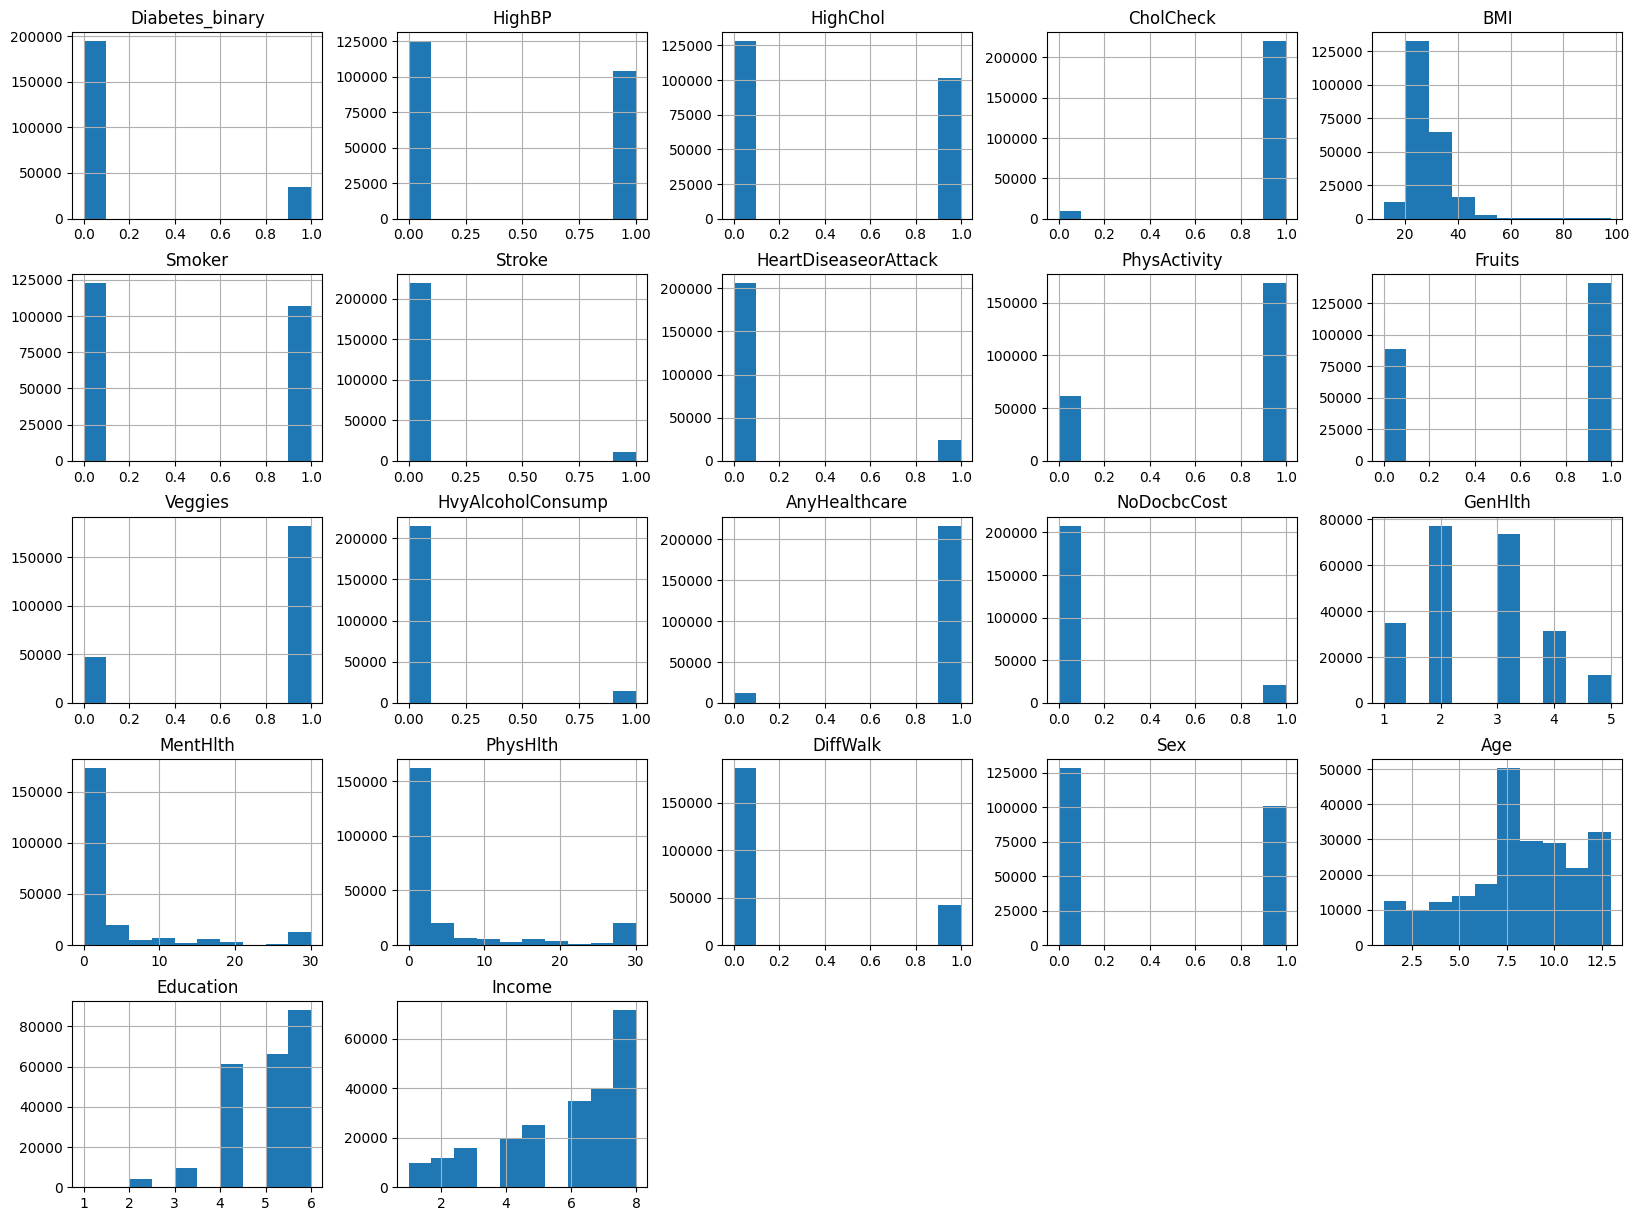

In [32]:
df.hist(figsize=(20,15))
plt.show()

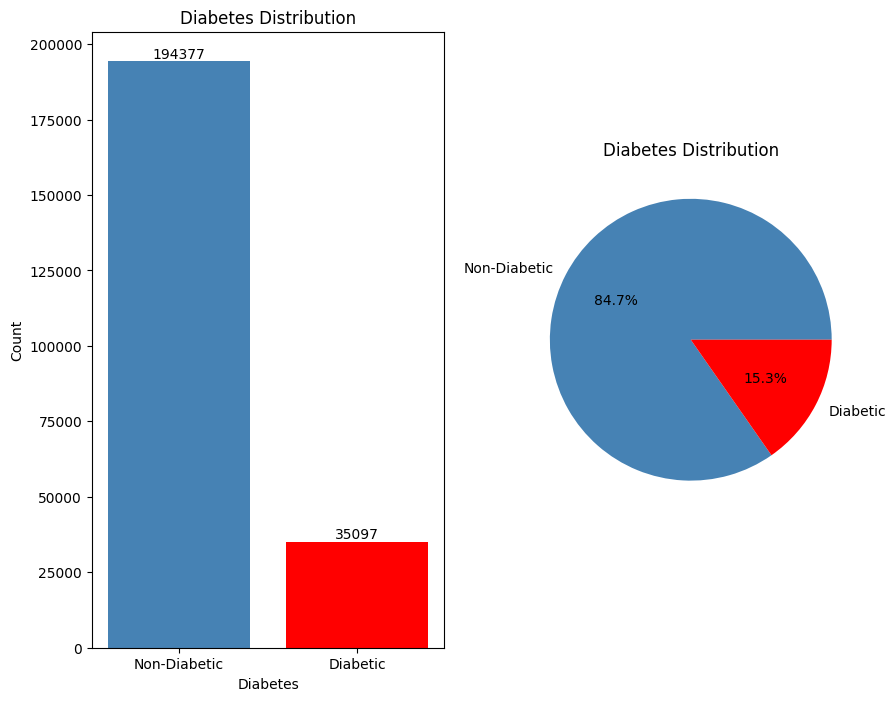

Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64


In [33]:
fig, ax = plt.subplots(1,2,figsize=(10,8))


cnt = df['Diabetes_binary'].value_counts()
labels = ["Non-Diabetic", "Diabetic"]
color= ["steelblue","red"]

# ---- Bar Chart ----
ax[0].bar(cnt.index, cnt.values, color=color)
ax[0].set_xticks(cnt.index)
ax[0].set_xticklabels(labels)

ax[0].set_title('Diabetes Distribution')
ax[0].set_xlabel('Diabetes')
ax[0].set_ylabel('Count')
ax[0].bar_label(ax[0].containers[0])

# ---- Pie Chart ----
colors = ["steelblue", "red"]
ax[1].pie(cnt, labels=labels, autopct='%1.1f%%', colors=colors)
ax[1].set_title('Diabetes Distribution')


plt.show()
print(cnt)


#### this dataset has imbalance of minority being less than 20% of the dataset, making it moderately imbalanced. ####

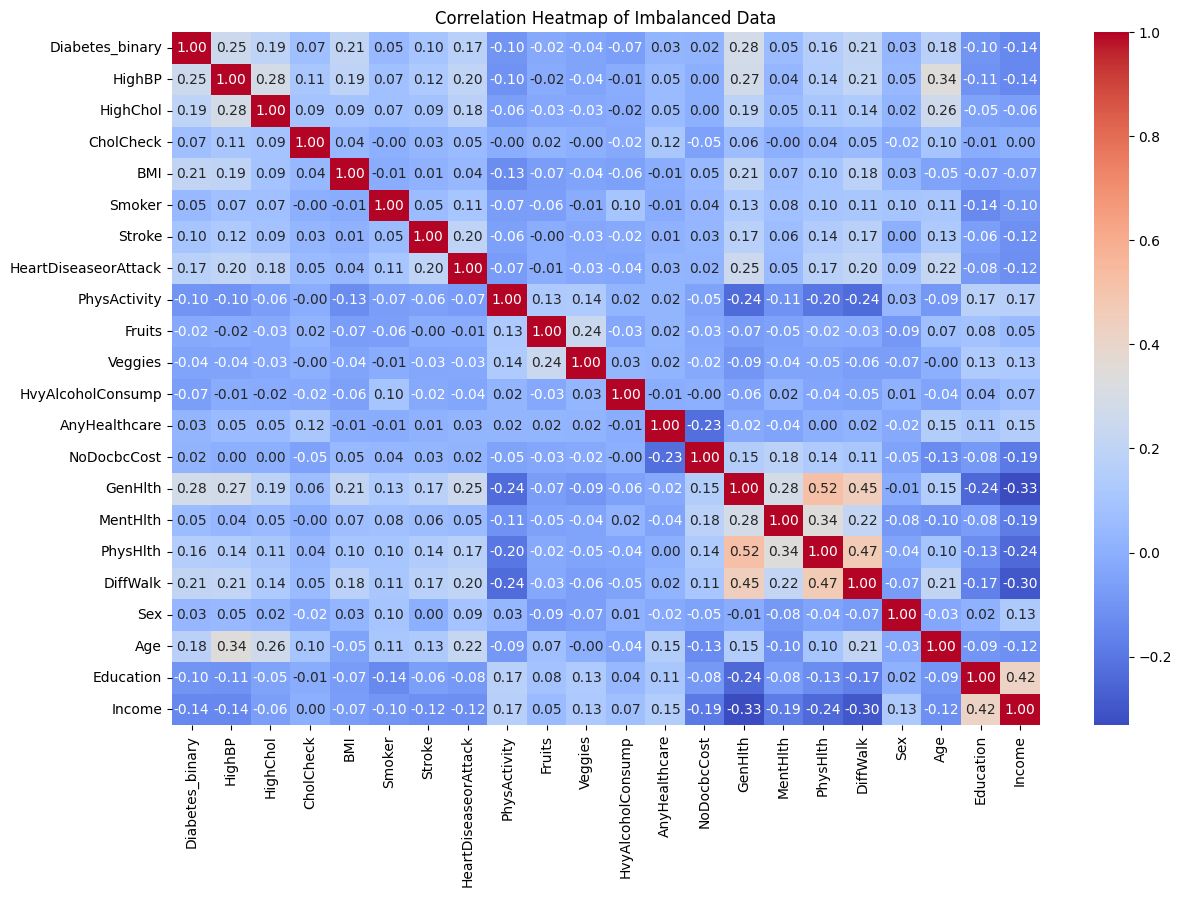

<Figure size 640x480 with 0 Axes>

In [34]:
cor = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(cor, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Imbalanced Data')
plt.show()
plt.savefig('correlation_heatmap.png')

✅ <font color='lightgreen'>**Positive relation**</font>: (GenHlth, PhysHlth), (GenHlth, DiffWalk), (PhysHlth, DiffWalk)

❌<font color='red'>**Negative relations**</font>: (GenHlth, Income), (DiffWalk, Income), (GenHlth, Education)


The heat map shows that the best features in predicting diabetes. Top 8 features:
* GenHlth = 0.29
* HighBP = 0.26
* BMI = 0.22
* DiffWalk = 0.22
* HighChol = 0.20
* Age = 0.18
* HeartDisease/Attack = 0.18
* PhysHlth = 0.17



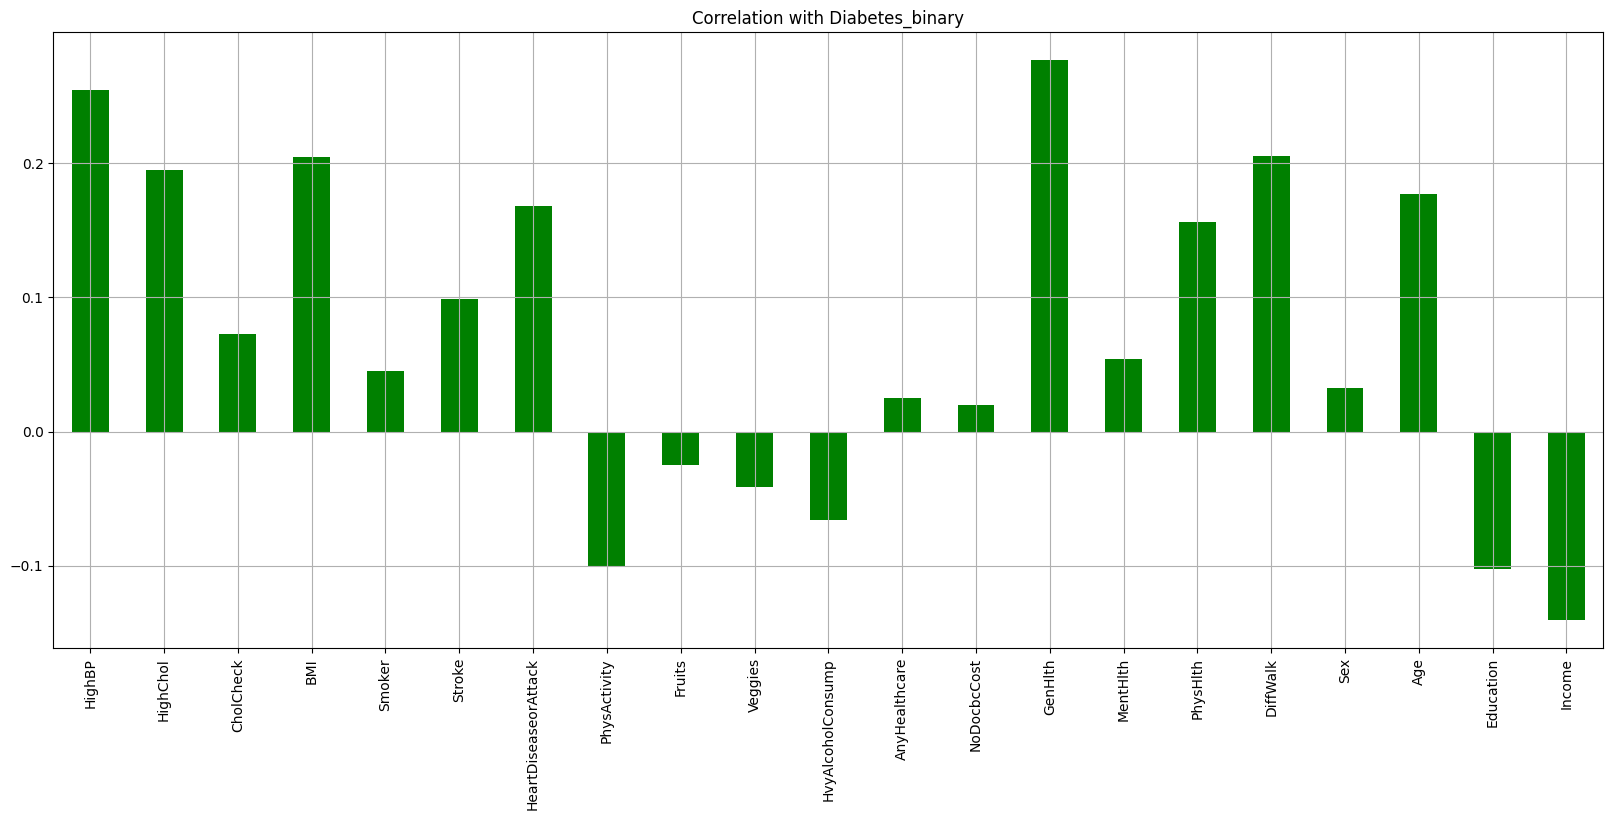

In [35]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar',grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Green");

#Diabetes_binary relationship with other columns

### GenHlth vs Diabetes

<ipython-input-36-772da10763f1>:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(data=df, x=df.GenHlth,hue='Diabetes_binary',color='r')


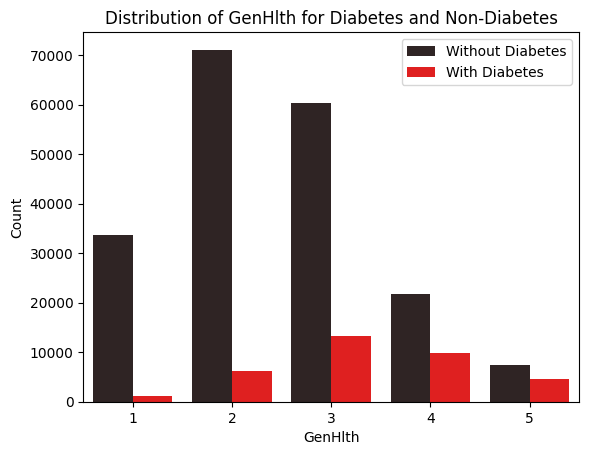

In [36]:
df['GenHlth'] = df['GenHlth'].astype(int)

# fig, ax1 = plt.subplots()


# sns.lineplot(data=newDF, x=newDF.GenHlth,y='Diabetes_binary',ax=ax1)
# ax2 = ax1.twinx()
# sns.countplot(data=newDF, x=newDF.GenHlth,hue='Diabetes_binary',ax=ax2)

sns.countplot(data=df, x=df.GenHlth,hue='Diabetes_binary',color='r')

plt.xlabel('GenHlth')
plt.ylabel('Count')
plt.legend(['Without Diabetes', 'With Diabetes'])
plt.title('Distribution of GenHlth for Diabetes and Non-Diabetes')
plt.show()

### BMI vs Diabetes

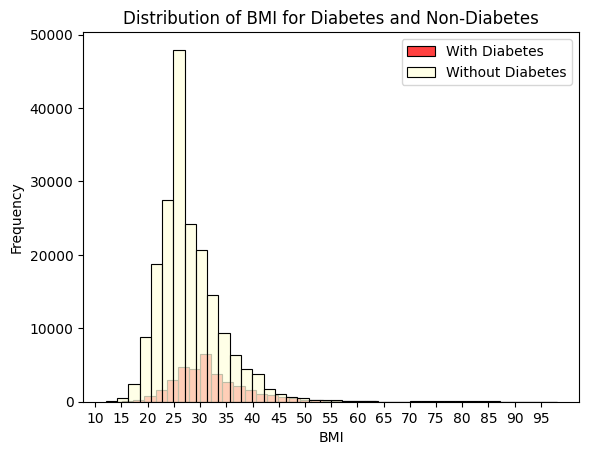

In [37]:
w_diab = df.loc[df['Diabetes_binary'] == 1]
wo_diab = df.loc[df['Diabetes_binary'] == 0]

sns.histplot(w_diab['BMI'], bins=40, color='red', label='With Diabetes')
sns.histplot(wo_diab['BMI'], bins=40, color='lightyellow', label='Without Diabetes')
plt.legend()
plt.xlabel('BMI')
plt.xticks(range(10, 100, 5))

plt.ylabel('Frequency')
plt.title('Distribution of BMI for Diabetes and Non-Diabetes')
plt.show()

### HighBP vs Diabetes

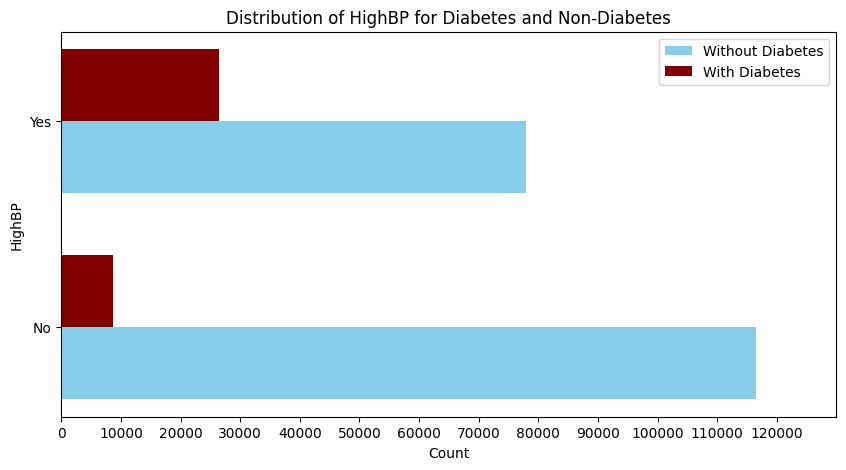

In [38]:
w_BP_counts = w_diab['HighBP'].value_counts().sort_index().reindex([0, 1], fill_value=0)
wo_BP_counts = wo_diab['HighBP'].value_counts().sort_index().reindex([0, 1], fill_value=0)


#w_BP_counts = w_BP_counts
#wo_BP_counts = wo_BP_counts

fig, ax = plt.subplots(figsize=(10,5))

labels = ['No', 'Yes']
y = np.arange(len(labels))
bar_height = 0.35

ax.barh(y - bar_height/2, wo_BP_counts.values, height=bar_height, color='skyblue', label='Without Diabetes')
ax.barh(y + bar_height/2, w_BP_counts.values, height=bar_height, color='maroon', label='With Diabetes')

ax.set_xlabel('Count')
ax.set_ylabel('HighBP')
ax.set_yticks([0,1])
ax.set_yticklabels(['No', 'Yes'])
ax.set_xbound(0,130000)
ax.set_xticks(np.arange(0, 130000, 10000))

ax.legend()
ax.set_title('Distribution of HighBP for Diabetes and Non-Diabetes')
plt.show()


In [39]:
pd.crosstab(df['Diabetes_binary'], df['HighBP'])

HighBP,0.0,1.0
Diabetes_binary,,
0.0,116522,77855
1.0,8692,26405


### DiffWalk vs Diabetes

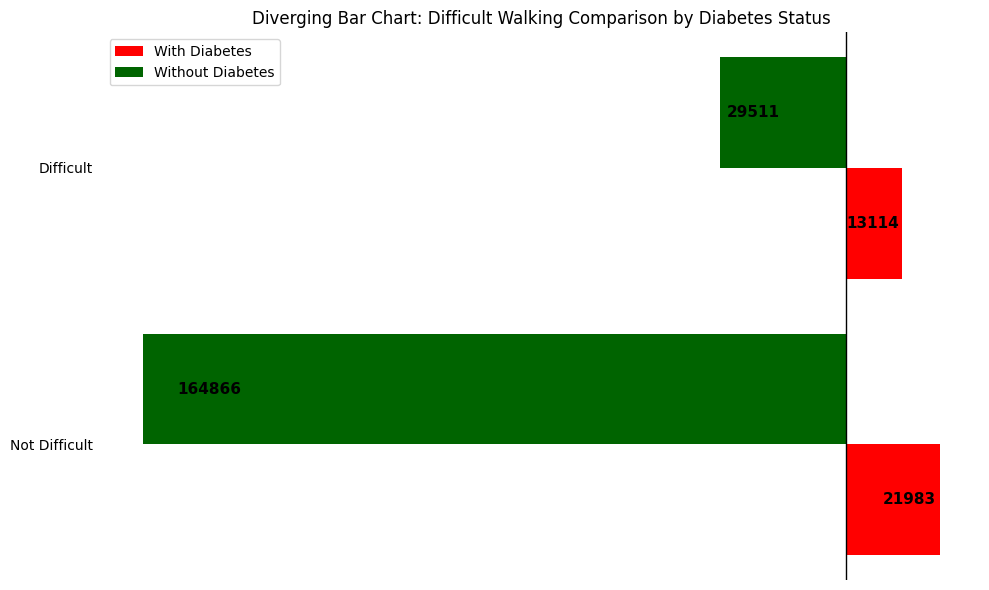

In [40]:
###
no_d_w_counts = wo_diab['DiffWalk'].value_counts().sort_index().reindex([0, 1], fill_value=0)
d_w_counts = w_diab['DiffWalk'].value_counts().sort_index().reindex([0, 1], fill_value=0)

labels = ['Not Difficult', 'Difficult']
y = np.arange(len(labels))

wo_vals = [-no_d_w_counts[0], -no_d_w_counts[1]]
w_vals = [d_w_counts[0], d_w_counts[1]]

bar_width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.barh(y - bar_width/2, w_vals, height=bar_width, color='red', label='With Diabetes')

bar2 = ax.barh(y + bar_width/2, wo_vals, height=bar_width, color='darkgreen', label='Without Diabetes')

def label_inside_bars(bars):
    for bar in bars:
        val = bar.get_width()
        label = str(abs(int(val)))

        if val < 0:
            x_pos = val + abs(val) * 0.05
            ha = 'left'
        else:
            x_pos = val - abs(val) * 0.05
            ha = 'right'
        ax.text(x_pos, bar.get_y() + bar.get_height() / 2, label,
                va='center', ha=ha, color='black', fontsize=11, fontweight='bold')

label_inside_bars(bar1)
label_inside_bars(bar2)


ax.axvline(0, color='black', linewidth=1)
ax.set_yticks(y)
ax.set_yticklabels(labels)

for spine in ax.spines.values():
    spine.set_visible(False)


ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_title('Diverging Bar Chart: Difficult Walking Comparison by Diabetes Status')
ax.legend()
plt.tight_layout()
plt.show()


In [41]:
# print("With Diabetes:")
# print(d_w_counts.to_string())
# print()

# print("Without Diabetes:")
# print(no_d_w_counts.to_string())
pd.crosstab(df['Diabetes_binary'], df['DiffWalk'])

DiffWalk,0.0,1.0
Diabetes_binary,,
0.0,164866,29511
1.0,21983,13114


### HighCol vs Diabetes

In [42]:
df.loc[(df['HighChol'] > 0) & (df['HighChol'] < 0.5)]['HighChol']

,HighChol


Text(0.5, 0, 'HighChol')

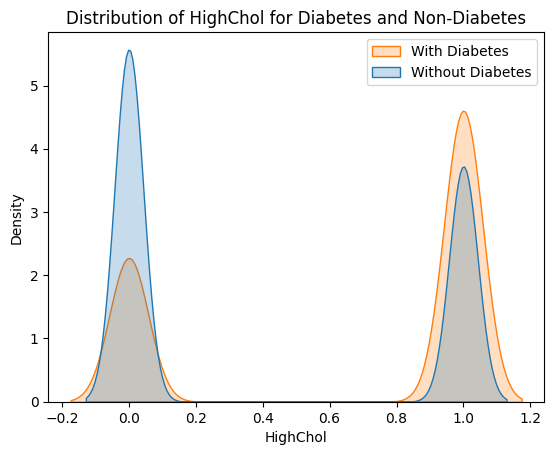

In [43]:
sns.kdeplot(data=df, x='HighChol', hue='Diabetes_binary', fill=True, common_norm=False)
plt.legend(labels=['With Diabetes', 'Without Diabetes'])
plt.title('Distribution of HighChol for Diabetes and Non-Diabetes')
plt.xlabel('HighChol')

In [44]:
pd.crosstab(df['Diabetes_binary'], df['HighChol'])

HighChol,0.0,1.0
Diabetes_binary,,
0.0,116528,77849
1.0,11601,23496


### Age vs Diabetes

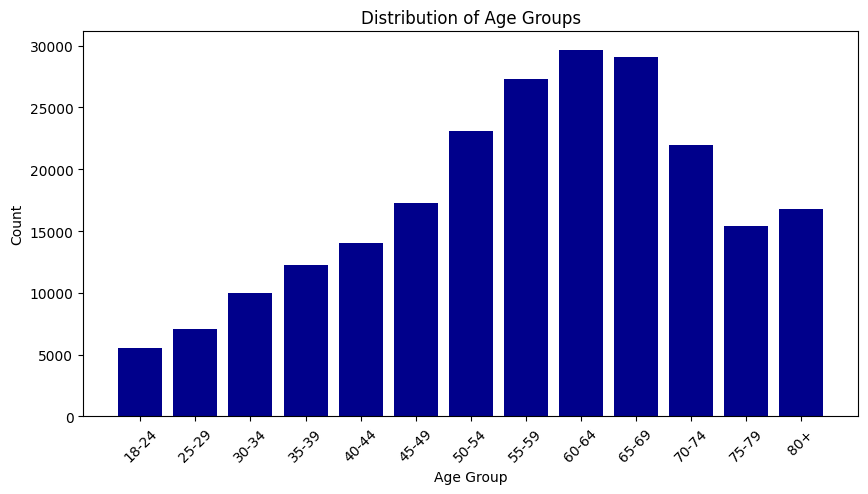

In [45]:
####

age_mapping = {
    1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39",
    5: "40-44", 6: "45-49", 7: "50-54", 8: "55-59",
    9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79", 13: "80+"
}



df['Age_Group'] = df['Age'].map(age_mapping)
all_age_counts = df['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(all_age_counts.index, all_age_counts.values, color = "darkblue")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

<ipython-input-46-7908b3764b35>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Age_Group'] = db['Age'].map(age_mapping)


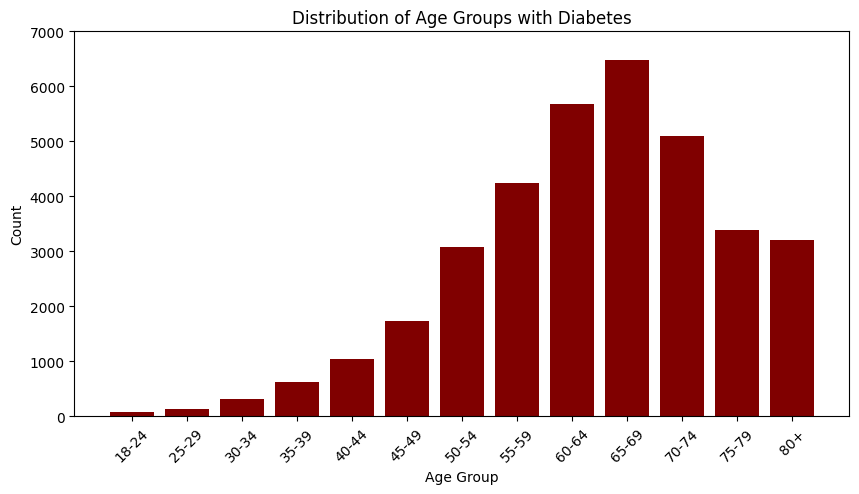

In [46]:
####


db = df[df['Diabetes_binary'] == 1]

db['Age_Group'] = db['Age'].map(age_mapping)
age_counts = db['Age_Group'].value_counts().reindex(all_age_counts.index, fill_value=0)

plt.figure(figsize=(10,5))
plt.bar(age_counts.index, age_counts.values, color = "maroon")
plt.ylim(0, 7000)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups with Diabetes')
plt.xticks(rotation=45)
plt.show()

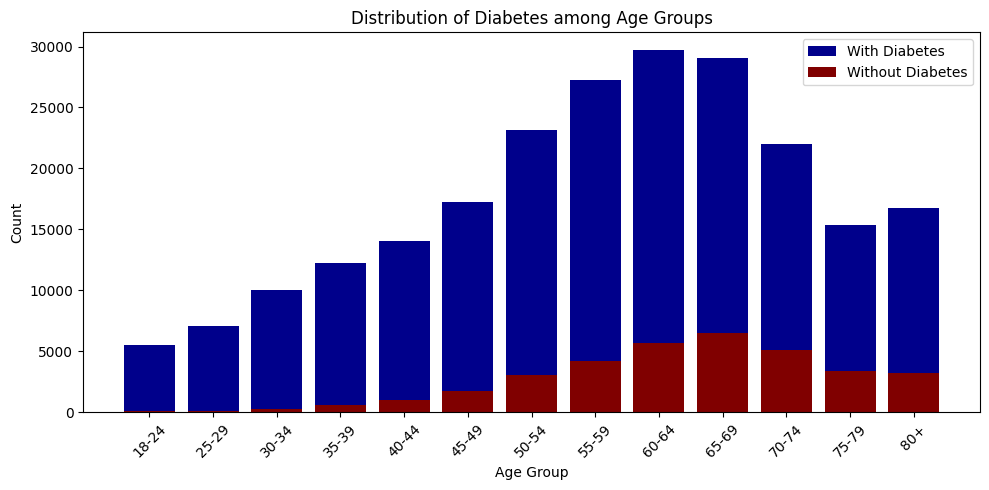

In [47]:

fig, ax = plt.subplots(figsize=(10,5))

labels = all_age_counts.index
x = np.arange(len(labels))

plt.bar(x, all_age_counts.values, color='darkblue', label='')
plt.bar(x, age_counts.values, color='maroon', label='With Diabetes')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['With Diabetes', 'Without Diabetes'])
plt.title('Distribution of Diabetes among Age Groups')
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.tight_layout()
plt.show()

### Heart Disease vs Diabetes

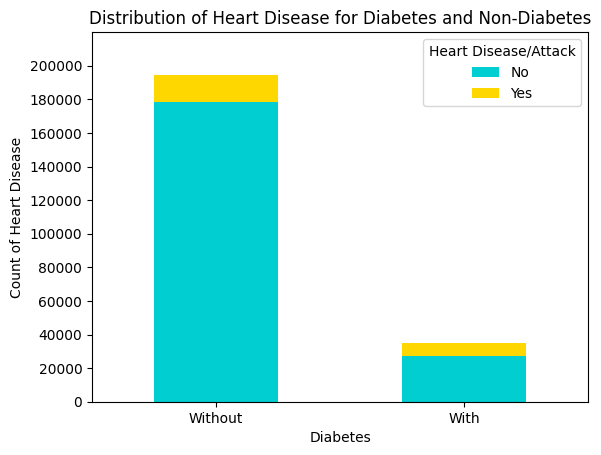

HeartDiseaseorAttack,0.0,1.0
Diabetes_binary,,
0.0,178520,15857
1.0,27241,7856


In [48]:
cnt = pd.crosstab(df['Diabetes_binary'], df['HeartDiseaseorAttack'])
ax = cnt.plot(kind='bar', stacked=True, color=["darkturquoise", "gold"])
ax.set_ybound(0,220000)
ax.set_yticks(np.arange(0, 220000, 20000))
ax.xaxis.set_ticklabels(['Without', 'With'], rotation=0)
ax.set_xlabel('Diabetes')
ax.set_ylabel('Count of Heart Disease')
ax.set_title('Distribution of Heart Disease for Diabetes and Non-Diabetes')
plt.legend(title="Heart Disease/Attack",labels=["No","Yes"])
plt.show()
cnt

### PhysHlt vs GenHlth (High Corr)

In [49]:
health_table = pd.crosstab(df['GenHlth'], df['PhysHlth'])
health_table

PhysHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
GenHlth,,,,,,,,,,,,,,,,,,,,,
1,28023,1777,1622,835,381,537,77,380,50,15,...,49,3,2,2,23,1,6,15,5,416
2,54725,4971,5536,2704,1302,2029,291,1301,189,33,...,135,7,6,11,97,9,6,40,19,1365
3,44039,3540,5568,3419,1830,3114,519,1703,292,75,...,222,13,12,14,244,12,19,82,32,3313
4,9110,741,1638,1301,881,1700,369,981,231,43,...,196,26,25,26,567,22,34,194,68,6787
5,681,44,127,176,127,215,72,166,47,13,...,61,21,11,19,405,25,34,191,91,7504


In [50]:

# health_table.T.plot(figsize=(10, 15))


# plt.title('Line Plot: Physical Illnesses Distributions by GenHlth')
# plt.xlabel('Physical Illnesses/Injuries (Days)')
# plt.ylabel('Number of Respondents')
# plt.yticks(range(0, 50000, 5000))
# plt.xticks(range(0, 31, 2))

# custom_labels = ['1 - Excellent', '2 - Very Good', '3 - Good', '4 - Fair', '5 - Poor']

# plt.legend(title='GenHlth', labels=custom_labels, title_fontsize=15, fontsize=12)
# plt.tight_layout()
# plt.show()

##Oversampling

In [51]:
df.dropna(inplace=True)
df.isna().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [52]:
df = df.drop('Age_Group', axis=1)

Top 5 positive features: GenHlth, HighBP, HighCh, BMI, Age

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 2: Separate features and target
# Assuming 'Diabetes_binary' is the target column (can be different in your file)
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

# Check class distribution before oversampling
print("Before Oversampling:", Counter(y))

# Step 3: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after oversampling
print("After Oversampling:", Counter(y_resampled))


Before Oversampling: Counter({0.0: 194377, 1.0: 35097})
After Oversampling: Counter({0.0: 194377, 1.0: 194377})


## Models

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier     # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier  # KNN

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')

# Separate features and target
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# Show class distribution before SMOTE
print("Before SMOTE - y_train:", Counter(y_train))
print("Before SMOTE - y_test:", Counter(y_test))

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Show class distribution after SMOTE
print("After SMOTE - y_train:", Counter(y_train_resampled))

Before SMOTE - y_train: Counter({0.0: 174667, 1.0: 28277})
Before SMOTE - y_test: Counter({0.0: 43667, 1.0: 7069})
After SMOTE - y_train: Counter({0.0: 174667, 1.0: 174667})


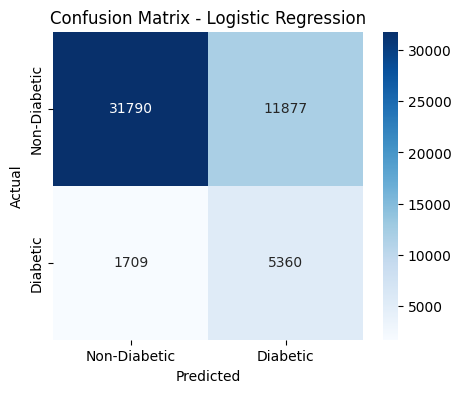

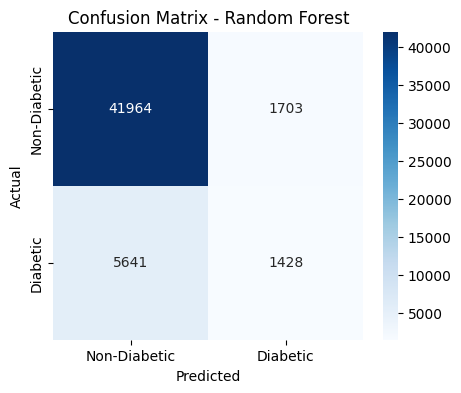

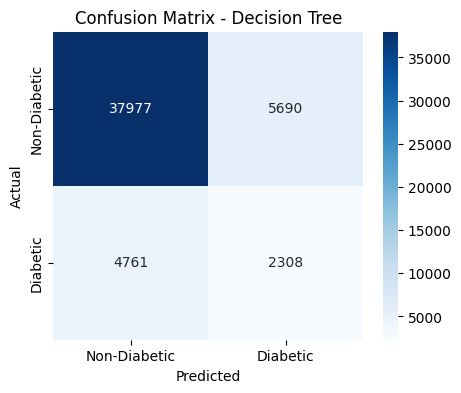

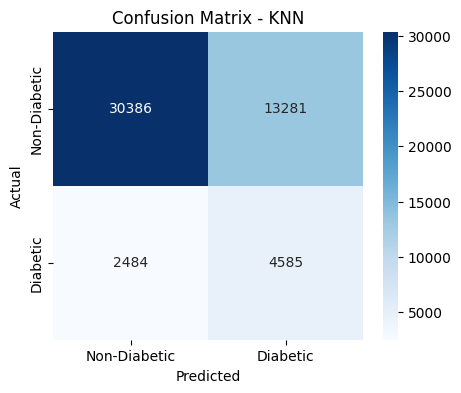


Model Performance Comparison:

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.7322     0.3110  0.7582    0.4410
1        Random Forest    0.8553     0.4561  0.2020    0.2800
2        Decision Tree    0.7940     0.2886  0.3265    0.3064
3                  KNN    0.6893     0.2566  0.6486    0.3678


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

# Features and target
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Store results
results = []

# Plot confusion matrices and collect metrics
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Comparison table
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")
print(results_df.round(4))


In [59]:
# Random Forest Tuning
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
rf_gs = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=3, scoring='f1')
rf_gs.fit(X_train_resampled, y_train_resampled)
print("\nBest Random Forest Params:", rf_gs.best_params_)

# KNN Tuning
knn_grid = {
    'n_neighbors': [3, 5, 7, 9]
}
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=3, scoring='f1')
knn_gs.fit(X_train_resampled, y_train_resampled)
print("Best KNN Params:", knn_gs.best_params_)


Best Random Forest Params: {'max_depth': None, 'n_estimators': 200}
Best KNN Params: {'n_neighbors': 3}


In [60]:
import joblib

# Create a DataFrame from stored results
results_df = pd.DataFrame(results)

# Find the best model by F1 Score
best_model_name = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]["Model"]
print(f"\nBest Model: {best_model_name}")

# Get the model object
best_model = models[best_model_name]

# Example: Predict on new test data (use X_test from earlier)
predictions = best_model.predict(X_test)

# Show first 10 predictions
print("\nPredictions on test set:", predictions[:10])

# Save the best model
joblib.dump(best_model, f"{best_model_name.replace(' ', '_')}_model.pkl")
print(f"\nSaved as {best_model_name.replace(' ', '_')}_model.pkl")

# Load and use it again later (example)
# loaded_model = joblib.load("Logistic_Regression_model.pkl")
# loaded_model.predict(new_data)


Best Model: Logistic Regression

Predictions on test set: [1. 1. 0. 0. 1. 0. 0. 0. 0. 1.]

Saved as Logistic_Regression_model.pkl


In [61]:
# Example input: one sample (make sure it's preprocessed like training data)
new_patient = X.iloc[0:1]  # Replace with your new patient data

# Predict diabetes status
prediction = best_model.predict(new_patient)
print("\nDiabetes prediction for new patient:", "Positive" if prediction[0] == 1 else "Negative")



Diabetes prediction for new patient: Positive


In [62]:
from google.colab import files
files.download('Logistic_Regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !pip install streamlit #does not work on google collab like it does on local

In [64]:
#copy and paste into code editor and save it. Run on command line:
# pip install streamlit
# streamlit run app.py


import streamlit as st
import pandas as pd
import joblib

# Load the trained model
best_model = joblib.load("Logistic_Regression_model.pkl")  # or Logistic_Regression_model.pkl

st.title("🩺 Diabetes Prediction App")

st.write("Enter the patient's health indicators below:")

# Create input fields for each feature
def user_input_features():
    HighBP = st.selectbox('High Blood Pressure', [0, 1])
    HighChol = st.selectbox('High Cholesterol', [0, 1])
    CholCheck = st.selectbox('Cholesterol Check (in past 5 years)', [0, 1])
    BMI = st.slider('Body Mass Index', 10.0, 50.0, 25.0)
    Smoker = st.selectbox('Smoker', [0, 1])
    Stroke = st.selectbox('History of Stroke', [0, 1])
    HeartDiseaseorAttack = st.selectbox('Heart Disease or Heart Attack', [0, 1])
    PhysActivity = st.selectbox('Physical Activity in past 30 days', [0, 1])
    Fruits = st.selectbox('Consumes Fruit Daily', [0, 1])
    Veggies = st.selectbox('Consumes Vegetables Daily', [0, 1])
    HvyAlcoholConsump = st.selectbox('Heavy Alcohol Consumption', [0, 1])
    AnyHealthcare = st.selectbox('Has any Healthcare Coverage', [0, 1])
    NoDocbcCost = st.selectbox('Couldn’t See Doctor Because of Cost', [0, 1])
    GenHlth = st.slider('General Health (1 = excellent, 5 = poor)', 1, 5, 3)
    MentHlth = st.slider('Poor Mental Health Days (past 30)', 0, 30, 0)
    PhysHlth = st.slider('Poor Physical Health Days (past 30)', 0, 30, 0)
    DiffWalk = st.selectbox('Difficulty Walking', [0, 1])
    Sex = st.selectbox('Sex (0 = female, 1 = male)', [0, 1])
    Age = st.slider('Age Category (numeric)', 1, 13, 5)
    Education = st.slider('Education Level (1 = less than HS, 6 = college grad)', 1, 6, 4)
    Income = st.slider('Income Level (1 = lowest, 8 = highest)', 1, 8, 4)

    data = {
        'HighBP': HighBP,
        'HighChol': HighChol,
        'CholCheck': CholCheck,
        'BMI': BMI,
        'Smoker': Smoker,
        'Stroke': Stroke,
        'HeartDiseaseorAttack': HeartDiseaseorAttack,
        'PhysActivity': PhysActivity,
        'Fruits': Fruits,
        'Veggies': Veggies,
        'HvyAlcoholConsump': HvyAlcoholConsump,
        'AnyHealthcare': AnyHealthcare,
        'NoDocbcCost': NoDocbcCost,
        'GenHlth': GenHlth,
        'MentHlth': MentHlth,
        'PhysHlth': PhysHlth,
        'DiffWalk': DiffWalk,
        'Sex': Sex,
        'Age': Age,
        'Education': Education,
        'Income': Income
    }

    return pd.DataFrame([data])

# Get user input
input_df = user_input_features()

# Prediction
if st.button("Predict Diabetes Status"):
    prediction = best_model.predict(input_df)[0]
    st.subheader("🧾 Result:")
    st.success("Positive for Diabetes" if prediction == 1 else "Negative for Diabetes")


2025-04-27 07:16:12.974 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 07:16:12.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 07:16:12.977 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 07:16:12.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 07:16:12.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 07:16:12.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 07:16:12.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 07:16:12.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar